# Домашнее задание №4

## Задача №0 (3)
Дорешайте задачу про риды и BWT из файла practice4.ipynb. В ответе помимо кода укажите количество ридов первой, второй и третьей категории, а также вкратце опишите ход решения.

In [12]:
from pysuffixarray.core import SuffixArray
from Bio import SeqIO

record = SeqIO.read("BWT_folder/genome.fa", "fasta")
genome_sequence = str(record.seq)


In [17]:
class BWTSearcher:
    def __init__(self, reference):
        # Construct the suffix array
        self.sa = SuffixArray(reference)

        # Construct the BWT from the suffix array
        self.bwt_text = ''.join(reference[i-1] if i != 0 else '$' for i in self.sa.suffix_array())

        self.Occ = {ch: [0] * len(self.bwt_text) for ch in "$ACGT"}

        for i, ch in enumerate(self.bwt_text):
            for ch2 in "ACGT":
                if i != 0:
                    self.Occ[ch2][i] = self.Occ[ch2][i - 1]
            if ch in self.Occ.keys():
                self.Occ[ch][i] += 1

        self.count = {}
        total = 0
        for ch in "$ACGT":
            self.count[ch] = total
            total += self.bwt_text.count(ch)

    def bwt_pattern_search(self, pattern):
        top = 0
        bottom = len(self.bwt_text) - 1
        for char in reversed(pattern):
            if char in self.Occ:
                top = self.count[char] + (0 if top == 0 else self.Occ[char][top  - 1])
                bottom = self.count[char] + self.Occ[char][bottom] - 1
            else:
                return []

            if top > bottom:
                return []

        return self.sa.suffix_array()[top:bottom + 1]

In [18]:
bwt = BWTSearcher(genome_sequence)

In [23]:
error_mutations_free_count, one_mutations_count, five_mutations_count = 0, 0, 0
list_mutations_free, list_one_mutations, list_five_mutations = [], [], []
read_counter = 0

with open("BWT_folder/sample_reads.fasta", "r") as file:
    for record in SeqIO.parse(file, "fasta"):
        read_sequence = str(record.seq)
        read_counter += 1

        occurrences = bwt.bwt_pattern_search(read_sequence)
        num_occurrences = len(occurrences)

        # print(occurrences)
        
        read_type = 0
        if num_occurrences <= 1:
            error_mutations_free_count += 1
            list_mutations_free.append(read_counter)
        
        elif num_occurrences == 2:
            read_type = 1
            one_mutation_count += 1
            list_one_mutations.append(read_counter)
            
        elif num_occurrences >= 6:
            read_type = 5
            five_mutations_count += 1
            list_five_mutations.append(read_counter)

        print(f"Read {read_counter}/100:\t\t contain {read_type} mismatch")


Read 1/100:		 contain 0 mismatch
Read 2/100:		 contain 0 mismatch
Read 3/100:		 contain 0 mismatch
Read 4/100:		 contain 0 mismatch
Read 5/100:		 contain 0 mismatch
Read 6/100:		 contain 0 mismatch
Read 7/100:		 contain 0 mismatch
Read 8/100:		 contain 0 mismatch
Read 9/100:		 contain 0 mismatch
Read 10/100:		 contain 0 mismatch
Read 11/100:		 contain 0 mismatch
Read 12/100:		 contain 0 mismatch
Read 13/100:		 contain 0 mismatch
Read 14/100:		 contain 0 mismatch
Read 15/100:		 contain 0 mismatch
Read 16/100:		 contain 0 mismatch
Read 17/100:		 contain 0 mismatch
Read 18/100:		 contain 0 mismatch
Read 19/100:		 contain 0 mismatch
Read 20/100:		 contain 0 mismatch
Read 21/100:		 contain 0 mismatch
Read 22/100:		 contain 0 mismatch
Read 23/100:		 contain 0 mismatch
Read 24/100:		 contain 0 mismatch
Read 25/100:		 contain 0 mismatch
Read 26/100:		 contain 0 mismatch
Read 27/100:		 contain 0 mismatch
Read 28/100:		 contain 0 mismatch
Read 29/100:		 contain 0 mismatch
Read 30/100:		 contain 


Это домашнее задание можно выполнять целиком в этом ноутбуке, либо алгоритмы написать в отдельном файле и импортировать сюда, для использования. В папке data лежат два файла islands.fasta и nonIslands.fasta. В них хранятся прочтения из CpG островков и из обычных участков генома соответственно, этими данными нужно будет воспользоваться в первом задании.

## Задача №1 (1)
Определите частоты генерации для каждого из нуклеотидов внутри CpG островков и вне их. Посчитайте так-же частоты для всех упорядоченных пар нуклеотидов и сравните частоту пары CG внутри островков и снаружи. Сделайте вывод. 

In [24]:
for record in SeqIO.parse("data/islands.fasta", "fasta"):
    islands = str(record.seq)

for record in SeqIO.parse("data/nonIslands.fasta", "fasta"):
    nonIslands = str(record.seq)

In [25]:
def count_nucleotide_frequency(sequence):
    nucleotide_count = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
    total_nucleotides = len(sequence)
    for nucl in sequence:
        nucleotide_count[nucl] += 1
    frequency = {nucl: count / total_nucleotides for nucl, count in nucleotide_count.items()}
    return frequency

def count_cpg_frequency(sequence):
    cpg_count = sequence.count('CG')
    c_count = sequence.count('C')
    cpg_frequency = cpg_count / c_count if c_count > 0 else 0
    return cpg_frequency

def count_cg_pair_frequency(sequence):
    pair_count = sequence.count('CG')
    total_pairs = len(sequence) - 1
    pair_frequency = pair_count / total_pairs if total_pairs > 0 else 0
    return pair_frequency



print("\t*** islands ***")
nucleotide_frequency = count_nucleotide_frequency(islands)
print("Частоты встречаемости нуклеотидов:", nucleotide_frequency)

cpg_frequency = count_cpg_frequency(islands)
print("Частота CpG островков:", cpg_frequency)

cg_pair_frequency = count_cg_pair_frequency(islands)
print("Частота пар нуклеотидов CG:", cg_pair_frequency)


print("\n\n\t*** nonIslands ***")
nucleotide_frequency = count_nucleotide_frequency(nonIslands)
print("Частоты нуклеотидов:", nucleotide_frequency)

cpg_frequency = count_cpg_frequency(nonIslands)
print("Частота CpG островков:", cpg_frequency)

cg_pair_frequency = count_cg_pair_frequency(nonIslands)
print("Частота пар нуклеотидов CG:", cg_pair_frequency)


	*** islands ***
Частоты нуклеотидов: {'A': 0.1755, 'C': 0.3185, 'G': 0.3405, 'T': 0.1655}
Частота CpG островков: 0.260596546310832
Частота пары нуклеотидов CG: 0.0830415207603802


	*** nonIslands ***
Частоты нуклеотидов: {'A': 0.28929861153616176, 'C': 0.19613640750872205, 'G': 0.1984481597792771, 'T': 0.3161168211758391}
Частота CpG островков: 0.026909597196216814
Частота пар нуклеотидов CG: 0.0052779765716222836


В nonIslands
Частота островков на 2 порядка 
Частоты G и C в потрора раза

In [95]:
# 
print(len(nonIslands))
print(len(islands))

212393
2000


## Задача №2 (2)
Напишите марковскую модель, которая имеет открытые состояния {A, T, G, C}, и скрытые состояния {+, -}. Когда модель в состоянии **+**, то вероятность генерации некоторого символа нуклеотида соответствует его частоте внутри CpG островков, вычислиному в первом задании, если состояние **-**, то частоте вне островков. Вероятность остаться внутри островка 0.95, а перейти в обычный геном 0.05. Для остальной части генома соответствующие вероятности 0.995 и 0.005. Саму модель можно реализовать в виде итератора, определив метод next, который возвращает пару - состояние и нуклеотид, который в этом состоянии произведен.    
Воспользуйтесь данной моделью для того чтобы сгенерировать набор из 20 последовательностей длинной от 1 000 до 100 000, причем к каждой последовательности должна прилагаться последовательность состояний.

In [35]:
import random

class MarkovModel:
    def __init__(self, nucleotide_freq_inside, nucleotide_freq_outside):
        self.CpG_freq = nucleotide_freq_inside
        self.non_CpG_freq = nucleotide_freq_outside
        self.transition_prob_inside = 0.95
        self.transition_prob_outside = 0.005
        self.current_state = '+'
        
    def next(self):
        if self.current_state == '+':
            self.current_state = '-' if random.random() > self.transition_prob_inside else '+'
            nucleotide = random.choices(['A', 'T', 'G', 'C'], weights=list(self.CpG_freq.values()))[0]
        else:
            self.current_state = '+' if random.random() > self.transition_prob_outside else '-'
            nucleotide = random.choices(['A', 'T', 'G', 'C'], weights=list(self.non_CpG_freq.values()))[0]
        return self.current_state, nucleotide

In [36]:
CpG_freq = count_nucleotide_frequency(islands)
non_CpG_freq = count_nucleotide_frequency(nonIslands)

model = MarkovModel(CpG_freq, non_CpG_freq)

sequences, states = [], []

for _ in range(20):
    sequence_length = random.randint(1000, 100000)
    sequence = ""
    state_sequence = ""
    for _ in range(sequence_length):
        state, nucleotide = model.next()
        sequence += nucleotide
        state_sequence += state
    sequences.append(sequence)
    states.append(state_sequence)


with open("Task_2.log", "w") as log:
    for i, (seq, state) in enumerate(zip(sequences, states), 1):
        log.write(f"\t\t*** Sequence {i}/20  (length is {len(seq)}) ***\n\n")
        log.write(seq)
        log.write("\n\nStates:\n")
        log.write(state)
        log.write("\n"*4)

## Задача №3 (4)
Напишите алгоритм Витерби для восстановления последовательности скрытых состояний марковской модели из второго задаания. Воспользуйтесь им, воссстановив состояния тех последовательностей, которые вы получили во втором задании и посчитайте TP, TN, FP, FN по количеству правильно или ошибочно предсказанных позиций из CpG остравков. 

#### плохая реализация: TN == FN

In [37]:
class Viterbi(MarkovModel):
    def __init__(self, CpG_freq, non_CpG_freq):
        self.CpG_freq = CpG_freq
        self.non_CpG_freq = non_CpG_freq
        self.current_state = '+'

    
    def viterbi(self, sequence):
        T = len(sequence)
        V = [{}]
        path = {}

        for state in ['+', '-']:
            V[0][state] = 1.0
            path[state] = [state]

        for t in range(1, T):
            V.append({})
            new_path = {}

            for next_state in ['+', '-']:
                (prob, prev_state) = max(
                    [(V[t - 1][prev_state] * self.transition_probability(prev_state, next_state) *
                      self.emission_probability(next_state, sequence[t]), prev_state)
                     for prev_state in ['+', '-']]
                )
                V[t][next_state] = prob
                new_path[next_state] = path[prev_state] + [next_state]

            path = new_path

        (prob, state) = max((V[T - 1][final_state], final_state) for final_state in ['+', '-'])
        return path[state]

    def transition_probability(self, prev_state, next_state):
        if prev_state == '+' and next_state == '+':
            return 0.95
        elif prev_state == '+' and next_state == '-':
            return 0.05
        elif prev_state == '-' and next_state == '-':
            return 0.995
        elif prev_state == '-' and next_state == '+':
            return 0.005

    def emission_probability(self, state, nucleotide):
        if state == '+':
            return self.CpG_freq[nucleotide]
        else:
            return self.non_CpG_freq[nucleotide]

In [29]:
def calculate_metrics(true_states, predicted_states):
    TP, TN, FP, FN = 0, 0, 0, 0
    for true_state, pred_state in zip(true_states, predicted_states):
        if true_state == '+' and pred_state == '+':
            TP += 1
        elif true_state == '-' and pred_state == '-':
            TN += 1
        elif true_state == '-' and pred_state == '+':
            FP += 1
        elif true_state == '+' and pred_state == '-':
            FN += 1
    return TP, TN, FP, FN


model_viterbi = Viterbi(CpG_freq, non_CpG_freq)
for i, (sequence, true_states) in enumerate(zip(sequences, states), 1):
    predicted_states = model_viterbi.viterbi(sequence)
    tp, tn, fp, fn = calculate_metrics(true_states, predicted_states)

    print(f"*** Sequence {i}/20  (length is {len(sequence)}) ***\n")
    print(f"TP: {tp}\tTN: {tn}\tFP: {fp}\tFN: {tn}\n\n")

*** Sequence 1/20  (length is 17285) ***

TP: 0	TN: 772	FP: 0	FN: 772


*** Sequence 2/20  (length is 58297) ***

TP: 23	TN: 2797	FP: 2	FN: 2797


*** Sequence 3/20  (length is 54202) ***

TP: 86	TN: 2551	FP: 6	FN: 2551


*** Sequence 4/20  (length is 23387) ***

TP: 0	TN: 1161	FP: 0	FN: 1161


*** Sequence 5/20  (length is 10466) ***

TP: 140	TN: 474	FP: 2	FN: 474


*** Sequence 6/20  (length is 50368) ***

TP: 0	TN: 2451	FP: 0	FN: 2451


*** Sequence 7/20  (length is 24254) ***

TP: 0	TN: 1189	FP: 0	FN: 1189


*** Sequence 8/20  (length is 54706) ***

TP: 0	TN: 2575	FP: 0	FN: 2575


*** Sequence 9/20  (length is 41706) ***

TP: 65	TN: 1989	FP: 4	FN: 1989


*** Sequence 10/20  (length is 65818) ***

TP: 99	TN: 3149	FP: 4	FN: 3149


*** Sequence 11/20  (length is 67363) ***

TP: 81	TN: 3226	FP: 2	FN: 3226


*** Sequence 12/20  (length is 58150) ***

TP: 0	TN: 2820	FP: 0	FN: 2820


*** Sequence 13/20  (length is 26101) ***

TP: 0	TN: 1242	FP: 0	FN: 1242


*** Sequence 14/20  (length is 

## Задача №4 (4)
Напишите алгоритм вперед назад для модели из второго задания. Пользуясь этим алгоритмом найдите вероятности того, что модель находилась в состоянии **+** для каждой позиции строк из второго задания. Устанавливая различные пороговые значения, определите позиции соответствующие CpG островкам и посчитайте TP. Постройте график зависимости TP от выбранного порогового значения. Есть ли пороговые значения при которых TP больше чем в задании №3?

### Почему-то всюду присвается TP = 0

In [92]:
class ForwardBackward(MarkovModel):
    def forward_backward(self, sequence):
        T = len(sequence)
        forward = [{} for _ in range(T)]
        backward = [{} for _ in range(T)]
        
        # forward
        for t in range(T):
            if t == 0:
                for state in ['+', '-']:
                    forward[t][state] = 1.0
            else:
                for next_state in ['+', '-']:
                    forward[t][next_state] = sum(
                        forward[t - 1][state] * self.transition_probability(state, next_state) * 
                        self.emission_probability(next_state, sequence[t])
                        for state in ['+', '-']
                    )

            # возникала ошибка при делении на 0
            total_forward_prob = sum(forward[t].values())
            for state in forward[t]:
                forward[t][state] /= total_forward_prob if total_forward_prob != 0 else 1.0
        

        
        # backward
        for t in range(T - 1, -1, -1):
            if t == T - 1:
                for state in ['+', '-']:
                    backward[t][state] = 1.0
            else:
                for prev_state in ['+', '-']:
                    backward[t][prev_state] = sum(
                        self.transition_probability(prev_state, next_state) * 
                        self.emission_probability(next_state, sequence[t + 1]) * 
                        backward[t + 1][next_state]
                        for next_state in ['+', '-']
                    )

            total_backward_prob = sum(backward[t].values())
            for state in backward[t]:
                backward[t][state] /= total_backward_prob if total_backward_prob != 0 else 1.0
        
        posterior_probs = []
        for t in range(T):
            posterior_probs.append({
                '+': forward[t]['+'] * backward[t]['+'],
                '-': forward[t]['-'] * backward[t]['-']
            })
            
        return posterior_probs
    
    def transition_probability(self, prev_state, next_state):
        if prev_state == '+' and next_state == '+':
            return self.transition_prob_inside
        elif prev_state == '+' and next_state == '-':
            return 1 - self.transition_prob_inside
        elif prev_state == '-' and next_state == '-':
            return 1 - self.transition_prob_outside
        elif prev_state == '-' and next_state == '+':
            return self.transition_prob_outside

    def emission_probability(self, state, nucleotide):
        if state == '+':
            return self.CpG_freq[nucleotide]
        else:
            return self.non_CpG_freq[nucleotide]

In [61]:
model_forward_backward = ForwardBackward(CpG_freq, non_CpG_freq)

posterior_probs_list = []
for sequence in sequences:
    posterior_probs_list.append(model_forward_backward.forward_backward(sequence))

thresholds = [0, 0.05, 0.25, 0.37, 0.6, 0.7, 0.8, 0.9]
all_TP = []
for sequence, true_state in zip(sequences, states):
    
    posterior_probs = model_forward_backward.forward_backward(sequence)
    
    TP_by_seq = []
    
    for threshold in thresholds:
        predicted_states = ['+' if posterior_prob['+'] > threshold else '-' for posterior_prob in posterior_probs]
        TP = sum(1 for pred_state, state in zip(predicted_states, true_state) if pred_state == '+' and true_state == '+')
        TP_by_seq.append(TP)
        
    all_TP.append(TP_by_seq)

for i, TP_by_seq in enumerate(all_TP, 1):
    print(f"*** Sequence {i}/20  (length is {len(sequence)}) ***\n")
    for threshold, TP in zip(thresholds, TP_by_seq):
        print(f"By threshold: {threshold}\t TP: {TP}")


*** Sequence 1/20  (length is 68481) ***

By threshold: 0	 TP: 0
By threshold: 0.05	 TP: 0
By threshold: 0.25	 TP: 0
By threshold: 0.37	 TP: 0
By threshold: 0.6	 TP: 0
By threshold: 0.7	 TP: 0
By threshold: 0.8	 TP: 0
By threshold: 0.9	 TP: 0
*** Sequence 2/20  (length is 68481) ***

By threshold: 0	 TP: 0
By threshold: 0.05	 TP: 0
By threshold: 0.25	 TP: 0
By threshold: 0.37	 TP: 0
By threshold: 0.6	 TP: 0
By threshold: 0.7	 TP: 0
By threshold: 0.8	 TP: 0
By threshold: 0.9	 TP: 0
*** Sequence 3/20  (length is 68481) ***

By threshold: 0	 TP: 0
By threshold: 0.05	 TP: 0
By threshold: 0.25	 TP: 0
By threshold: 0.37	 TP: 0
By threshold: 0.6	 TP: 0
By threshold: 0.7	 TP: 0
By threshold: 0.8	 TP: 0
By threshold: 0.9	 TP: 0
*** Sequence 4/20  (length is 68481) ***

By threshold: 0	 TP: 0
By threshold: 0.05	 TP: 0
By threshold: 0.25	 TP: 0
By threshold: 0.37	 TP: 0
By threshold: 0.6	 TP: 0
By threshold: 0.7	 TP: 0
By threshold: 0.8	 TP: 0
By threshold: 0.9	 TP: 0
*** Sequence 5/20  (length i

# Ещё раз

In [89]:
model = MarkovModel(CpG_freq, non_CpG_freq)

def forward_backward(sequence, model):
    n = len(sequence)
    forward = [{} for _ in range(n)]
    backward = [{} for _ in range(n)]
    scaling_factors = [0] * n

    # Forward pass
    for i in range(n):
        if i == 0:
            scaling_factors[i] = 1.0
            for state in ['+', '-']:
                forward[i][state] = 0.5
        else:
            scaling_factors[i] = 0
            for state in ['+', '-']:
                forward[i][state] = 0
                for prev_state in ['+', '-']:
                    if state == '+':
                        emission_prob = model.CpG_freq[sequence[i]]
                        transition_prob = model.transition_prob_inside if prev_state == '+' else (1 - model.transition_prob_inside)
                    else:
                        emission_prob = model.non_CpG_freq[sequence[i]]
                        transition_prob = model.transition_prob_outside if prev_state == '-' else (1 - model.transition_prob_outside)
                    forward[i][state] += forward[i-1][prev_state] * transition_prob * emission_prob
                scaling_factors[i] += forward[i][state]
            # Scaling
            scaling_factors[i] = 1.0 / scaling_factors[i]
            for state in ['+', '-']:
                forward[i][state] *= scaling_factors[i]

    # Backward pass
    for i in range(n - 1, -1, -1):
        if i == n - 1:
            for state in ['+', '-']:
                backward[i][state] = 1.0
        else:
            for state in ['+', '-']:
                backward[i][state] = 0
                for next_state in ['+', '-']:
                    if next_state == '+':
                        emission_prob = model.CpG_freq[sequence[i + 1]]
                        transition_prob = model.transition_prob_inside if state == '+' else (1 - model.transition_prob_inside)
                    else:
                        emission_prob = model.non_CpG_freq[sequence[i + 1]]
                        transition_prob = model.transition_prob_outside if state == '-' else (1 - model.transition_prob_outside)
                    backward[i][state] += backward[i+1][next_state] * transition_prob * emission_prob
                # Scaling
                backward[i][state] *= scaling_factors[i + 1]

    return forward, backward, scaling_factors

# Применяем алгоритм к каждой сгенерированной последовательности
for idx, sequence in enumerate(sequences):
    forward, backward, _ = forward_backward(sequence, model)
    print(f"Sequence {idx + 1}:")
    # for i in range(len(sequence)):
        # print(f"Position {i + 1}: Probability of being in state '+' = {forward[i]['+'] * backward[i]['+']}")


Sequence 1:
Sequence 2:
Sequence 3:
Sequence 4:
Sequence 5:
Sequence 6:
Sequence 7:
Sequence 8:
Sequence 9:
Sequence 10:
Sequence 11:
Sequence 12:
Sequence 13:
Sequence 14:
Sequence 15:
Sequence 16:
Sequence 17:
Sequence 18:
Sequence 19:
Sequence 20:


In [88]:
# Определим пороговые значения
cpg_threshold = 0.6
non_cpg_threshold = 0.4

# Посчитаем TP для разных пороговых значений
def count_TP(sequence, forward, backward, cpg_threshold, non_cpg_threshold):
    TP = 0
    for i in range(len(sequence)):
        prob_plus = forward[i]['+'] * backward[i]['+']
        prob_minus = forward[i]['-'] * backward[i]['-']
        if prob_plus > cpg_threshold and prob_minus < non_cpg_threshold:
            TP += 1
    return TP

# Посчитаем TP для каждой последовательности при различных пороговых значениях
TP_values = []
thresholds = [0.5, 0.6, 0.65, 0.7, 0.8]

for cpg_threshold in thresholds:
    TP_values.append([])
    print(f"\n\n***  Threshold is {cpg_threshold}  ***\n")
    for i, sequence in enumerate(sequences, 1):
        forward, backward, _ = forward_backward(sequence, model)
        TP = count_TP(sequence, forward, backward, cpg_threshold, non_cpg_threshold)
        TP_values[-1].append(TP)
        print(f"Sequence {i}/20\tTP: {TP}")



***  Threshold is 0.5  ***

Sequence 1/20	TP: 48203
Sequence 2/20	TP: 51893
Sequence 3/20	TP: 1031
Sequence 4/20	TP: 77712
Sequence 5/20	TP: 41127
Sequence 6/20	TP: 50292
Sequence 7/20	TP: 17899
Sequence 8/20	TP: 85382
Sequence 9/20	TP: 59909
Sequence 10/20	TP: 69880
Sequence 11/20	TP: 81170
Sequence 12/20	TP: 10099
Sequence 13/20	TP: 66175
Sequence 14/20	TP: 45018
Sequence 15/20	TP: 1137
Sequence 16/20	TP: 96866
Sequence 17/20	TP: 81363
Sequence 18/20	TP: 93132
Sequence 19/20	TP: 51055
Sequence 20/20	TP: 68481


***  Threshold is 0.6  ***

Sequence 1/20	TP: 48203
Sequence 2/20	TP: 51893
Sequence 3/20	TP: 1031
Sequence 4/20	TP: 77712
Sequence 5/20	TP: 41127
Sequence 6/20	TP: 50292
Sequence 7/20	TP: 17899
Sequence 8/20	TP: 85382
Sequence 9/20	TP: 59909
Sequence 10/20	TP: 69880
Sequence 11/20	TP: 81170
Sequence 12/20	TP: 10099
Sequence 13/20	TP: 66175
Sequence 14/20	TP: 45018
Sequence 15/20	TP: 1137
Sequence 16/20	TP: 96866
Sequence 17/20	TP: 81363
Sequence 18/20	TP: 93132
Sequence 19/

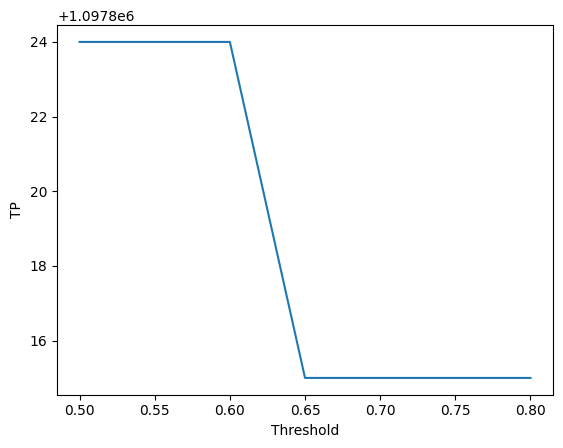

In [90]:
import matplotlib.pyplot as plt

TP_by_thresholds = list(map(sum, TP_values))
plt.plot(thresholds, TP_by_thresholds)

plt.xlabel('Threshold')
plt.ylabel('TP')
plt.show()